In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df= pd.read_csv('heart.csv')
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0


In [9]:
df.shape

(1025, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


### Removing Outliers using Inter-Quartile Range

In [11]:
continuous_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

Q1 = df[continuous_cols].quantile(0.25)
Q3 = df[continuous_cols].quantile(0.75)
IQR = Q3 - Q1

mask = ~((df[continuous_cols] < (Q1 - 1.5 * IQR)) | (df[continuous_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

df_clean = df[mask]


In [12]:
df_clean.shape

(968, 14)

In [13]:
from sklearn.model_selection import train_test_split, cross_val_score
X = df_clean.drop('target', axis=1)
y = df_clean['target']
print(X.shape)
print(y.shape)

(968, 13)
(968,)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Classification Using Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

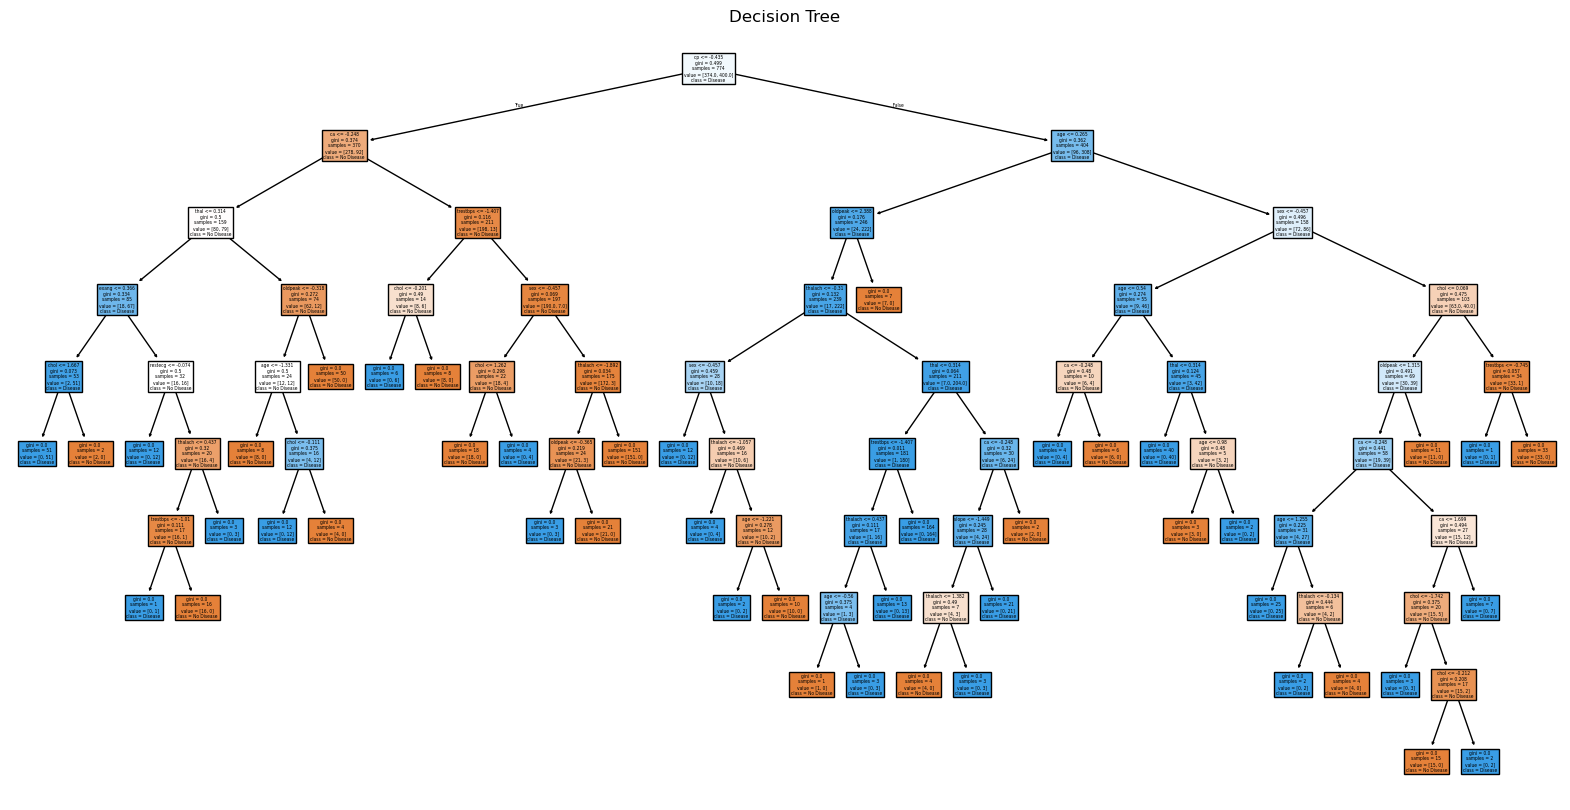

In [20]:
plt.figure(figsize=(20, 10))
plot_tree(dtree, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True)
plt.title("Decision Tree")
plt.show()

In [24]:
from sklearn.metrics import accuracy_score, classification_report
y_pred_dt = dtree.predict(X_test_scaled)
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt):.2f}")

Decision Tree Accuracy: 0.98


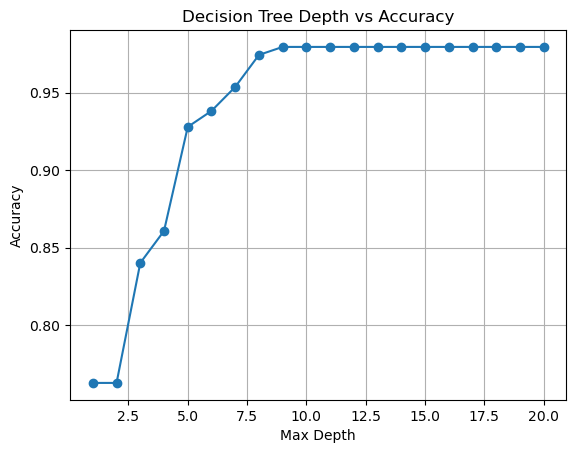

In [25]:
depths = list(range(1, 21))
dt_scores = []

for d in depths:
    dt = DecisionTreeClassifier(max_depth=d, random_state=42)
    dt.fit(X_train_scaled, y_train)
    score = accuracy_score(y_test, dt.predict(X_test_scaled))
    dt_scores.append(score)

plt.plot(depths, dt_scores, marker='o')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree Depth vs Accuracy")
plt.grid(True)
plt.show()

### Classification Using RandomForest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [27]:
y_pred_rf = rf.predict(X_test_scaled)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        86
           1       1.00      1.00      1.00       108

    accuracy                           1.00       194
   macro avg       1.00      1.00      1.00       194
weighted avg       1.00      1.00      1.00       194



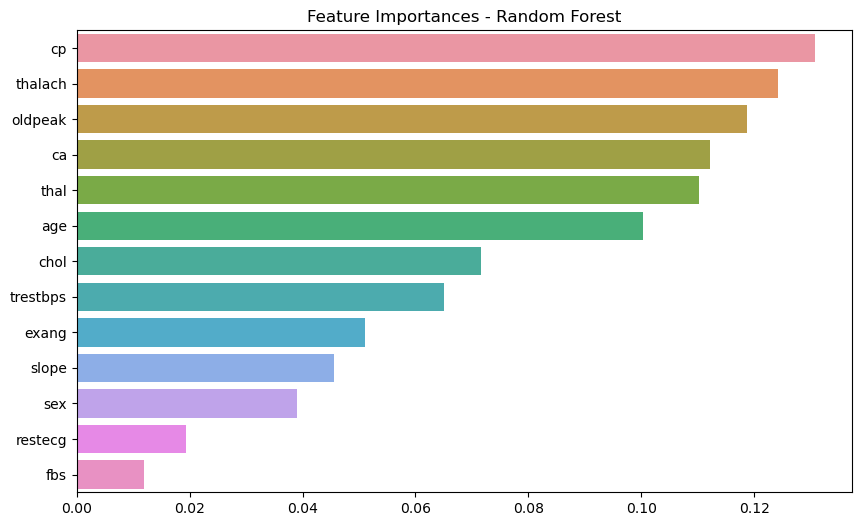

In [29]:
import numpy as np
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title("Feature Importances - Random Forest")
plt.show()

In [30]:
cv_scores = cross_val_score(RandomForestClassifier(random_state=42), X, y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean():.4f}")

Cross-validation scores: [1.         1.         1.         0.98445596 0.98445596]
Mean cross-validation accuracy: 0.9938
